In [1]:
import uproot
import hist
from hist import Hist
import matplotlib.pyplot as plt
import numpy as np
import mplhep as hep
import matplotlib

In [2]:
f_mumu = uproot.open("/home/submit/witt79/FCCAnalyzer/output_z_xsec_qq_gaga.root")

In [3]:
for key in f_mumu.keys():
    print(key) # includes a built-in "\n" 

wz3p6_ee_gaga_qq_ecm91p2;1
wz3p6_ee_gaga_qq_ecm91p2/Evis;1
wz3p6_ee_gaga_qq_ecm91p2/Evis_norm;1
wz3p6_ee_gaga_qq_ecm91p2/RP_no;1
wz3p6_ee_gaga_qq_ecm91p2/njets;1
wz3p6_ee_gaga_qq_ecm91p2/jets_e;1
wz3p6_ee_gaga_qq_ecm91p2/dijet_m;1
wz3p6_ee_gaga_qq_ecm91p2/dijet_m_final;1
wz3p6_ee_gaga_qq_ecm91p2/jets_phi;1
wz3p6_ee_gaga_qq_ecm91p2/visibleMass;1
wz3p6_ee_gaga_qq_ecm91p2/missingEnergy;1
wz3p6_ee_gaga_qq_ecm91p2/EVT_thrust_val;1
wz3p6_ee_gaga_qq_ecm91p2/EVT_cos_thrustangle;1
wz3p6_ee_gaga_qq_ecm91p2/EVT_cos_thrustangle_abs;1
wz3p6_ee_gaga_qq_ecm91p2/EVT_thrust_x;1
wz3p6_ee_gaga_qq_ecm91p2/EVT_thrust_y;1
wz3p6_ee_gaga_qq_ecm91p2/EVT_thrust_z;1
wz3p6_ee_gaga_qq_ecm91p2/EVT_thrust_r;1
wz3p6_ee_gaga_qq_ecm91p2/meta;1
p8_ee_gaga_qq_ecm91p2;1
p8_ee_gaga_qq_ecm91p2/Evis;1
p8_ee_gaga_qq_ecm91p2/Evis_norm;1
p8_ee_gaga_qq_ecm91p2/RP_no;1
p8_ee_gaga_qq_ecm91p2/njets;1
p8_ee_gaga_qq_ecm91p2/jets_e;1
p8_ee_gaga_qq_ecm91p2/dijet_m;1
p8_ee_gaga_qq_ecm91p2/dijet_m_final;1
p8_ee_gaga_qq_ecm91p2/jets_phi;1

The histograms are saved as `process_name/histogram_name`. We will now plot the Z peak after all the cuts (stored in `zll_m_cut4`) for the main `wzp6_ee_mumu_ecm91p2` process:

In [4]:
gaga_wh = f_mumu['wz3p6_ee_gaga_qq_ecm91p2/visibleMass'].to_hist()
gaga_wh = gaga_wh[::2j] # rebin with factor of 2

gaga_py = f_mumu['p8_ee_gaga_qq_ecm91p2/visibleMass'].to_hist()
gaga_py = gaga_py[::2j] # rebin with factor of 2


gaga_mE_wh = f_mumu['wz3p6_ee_gaga_qq_ecm91p2/missingEnergy'].to_hist()
gaga_mE_wh = gaga_wh[::2j] # rebin with factor of 2

gaga_mE_py = f_mumu['p8_ee_gaga_qq_ecm91p2/missingEnergy'].to_hist()
gaga_mE_py = gaga_py[::2j] # rebin with factor of 2


gaga_ma_wh = f_mumu['wz3p6_ee_gaga_qq_ecm91p2/dijet_m'].to_hist()
gaga_ma_wh = gaga_ma_wh[::2j]

gaga_ma_py = f_mumu['p8_ee_gaga_qq_ecm91p2/dijet_m'].to_hist()
gaga_ma_py = gaga_ma_py[::2j]


gaga_th_wh = f_mumu['wz3p6_ee_gaga_qq_ecm91p2/EVT_cos_thrustangle'].to_hist()
gaga_th_wh = gaga_th_wh[::2j]

gaga_th_py = f_mumu['p8_ee_gaga_qq_ecm91p2/EVT_cos_thrustangle'].to_hist()
gaga_th_py = gaga_th_py[::2j]

In [5]:
font = {'family':'DejaVu Sans',
        'size'   : 22}

matplotlib.rc('font', **font)

def create_shared_ratio_hist(data1, data2, label1, label2, title, xlabel, xtop):
    # Create a figure and two subplots, sharing the same x-axis
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(15, 10), height_ratios=[2, 1])
    
    fig.subplots_adjust(hspace=0)

    hist1_y, hist1_x = data1.to_numpy()
    hist2_y, hist2_x = data2.to_numpy()
    
    # For this to work we need to 'densify' by ensuring that 
    # each axis integrates to 1. 
    # To do this normalization, we claim that
    # axis_adjusted = c * old_axis
    # where we enforce integral c * old_axis = 1
    # Therefore, we know that c = 1 / integral of old axis
    # To compute the integral of the old axis, we can sum the y col
    
    density1 = sum(hist1_y)
    density2 = sum(hist2_y)
    
    sqrt_vals1 = np.sqrt(hist1_y)
    sqrt_vals2 = np.sqrt(hist2_y)
    
    org_hist1_y = hist1_y
    org_hist2_y = hist2_y
    hist1_y = hist1_y / (density1)
    hist2_y = hist2_y / (density2)

    hist1_x = hist1_x[:-1]
    hist2_x = hist2_x[:-1]
    
    width1 = [hist1_x[i+1] - hist1_x[i] for i in range(len(hist1_x)-1)]
    width2 = [hist2_x[i+1] - hist2_x[i] for i in range(len(hist2_x)-1)] 
    
    # create top plot error bars
    # sqrt(sigma_data ^ 2 * (1 / density) ^ 2 + sigma_density ^ 2 * (- data / density)^2)
    # sigma_density = sqrt(density)
    # sigma_data = sqrt(data)
    errorbars1 = np.sqrt((org_hist1_y / (density1 ** 2)) + density1 * (np.power(org_hist1_y, 2) / (density1 ** 4)))
    errorbars2 = np.sqrt((org_hist2_y / (density2 ** 2)) + density2 * (np.power(org_hist2_y, 2) / (density2 ** 4)))
    
    error_ratio = np.sqrt((errorbars1/org_hist2_y)**2 + ((org_hist1_y * errorbars2)/(org_hist2_y**2))**2 )

    
    # create ratio y
    hist3_y = hist1_y / (hist2_y) 
    
    # Plotting histogram on the first axis
    #ax1.bar(hist1_x[:-1], hist1_y[:-1], width=width1, align='edge', color='red', label=label1, alpha=0.7, fill=False)
    ax1.set_title(title, fontweight='bold')
    #ax1.bar(hist2_x[:-1], hist2_y[:-1], width=width2, align='edge', color='blue', label=label2, alpha=0.4, fill=False)
    ax1.step(hist1_x[:-1], hist1_y[:-1], label=label1, color='red')
    ax1.step(hist2_x[:-1], hist2_y[:-1], label=label2, color='blue')
    ax1.errorbar(hist1_x[:-1], hist1_y[:-1], yerr=errorbars1[:-1], fmt='', ls='' , label = "Whizard3 Error" , ecolor = "orange")
    ax1.errorbar(hist1_x[:-1], hist2_y[:-1], yerr=errorbars2[:-1], fmt='', ls='' , label = "Pythia8 Error" , ecolor = "green")
    
    ax1.legend()
    ax1.set_yscale('log')
    ax1.set_ylabel("Probability Density", fontweight='bold')
    
    
    #ax2.bar(hist2_x[:-1], hist3_y[:-1], width=width2, align='edge', color='black', label=f'{label1} / {label2}')
    ax2.axhline(1, linestyle='dashed', alpha=0.6)
    ax2.step(hist2_x[:-1], hist3_y[:-1], label=f'{label1} / {label2}', color='black')
    ax2.errorbar(hist2_x[:-1], hist3_y[:-1], yerr=error_ratio[:-1], fmt='', ls='' , label = "Ratio Error" , ecolor = "red")
    ax2.legend()
    ax2.set_xlim(0, xtop)
    ax2.set_xlabel(xlabel, fontweight='bold')
    ax2.set_ylabel("Ratio", fontweight='bold')
    
    plt.show()

/tmp/ipykernel_1301493/2521902930.py:47: RuntimeWarning: invalid value encountered in divide
  error_ratio = np.sqrt((errorbars1/org_hist2_y)**2 + ((org_hist1_y * errorbars2)/(org_hist2_y**2))**2 )
/tmp/ipykernel_1301493/2521902930.py:51: RuntimeWarning: invalid value encountered in divide
  hist3_y = hist1_y / (hist2_y)


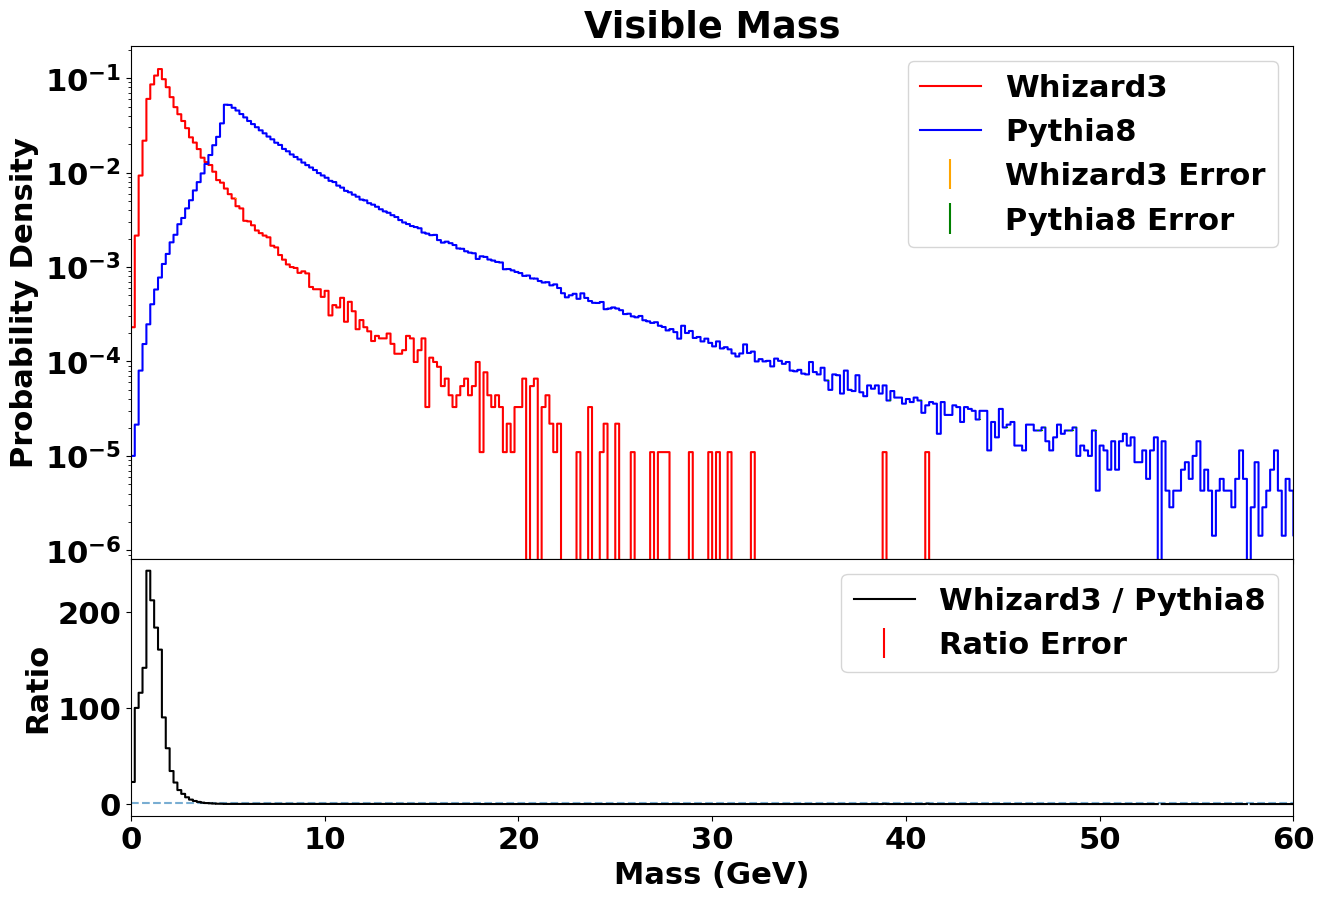

In [39]:
create_shared_ratio_hist(gaga_wh, gaga_py, 'Whizard3', 'Pythia8', r'Visible Mass', 'Mass (GeV)', 60)

/tmp/ipykernel_132844/2521902930.py:47: RuntimeWarning: invalid value encountered in divide
  error_ratio = np.sqrt((errorbars1/org_hist2_y)**2 + ((org_hist1_y * errorbars2)/(org_hist2_y**2))**2 )
/tmp/ipykernel_132844/2521902930.py:51: RuntimeWarning: invalid value encountered in divide
  hist3_y = hist1_y / (hist2_y)


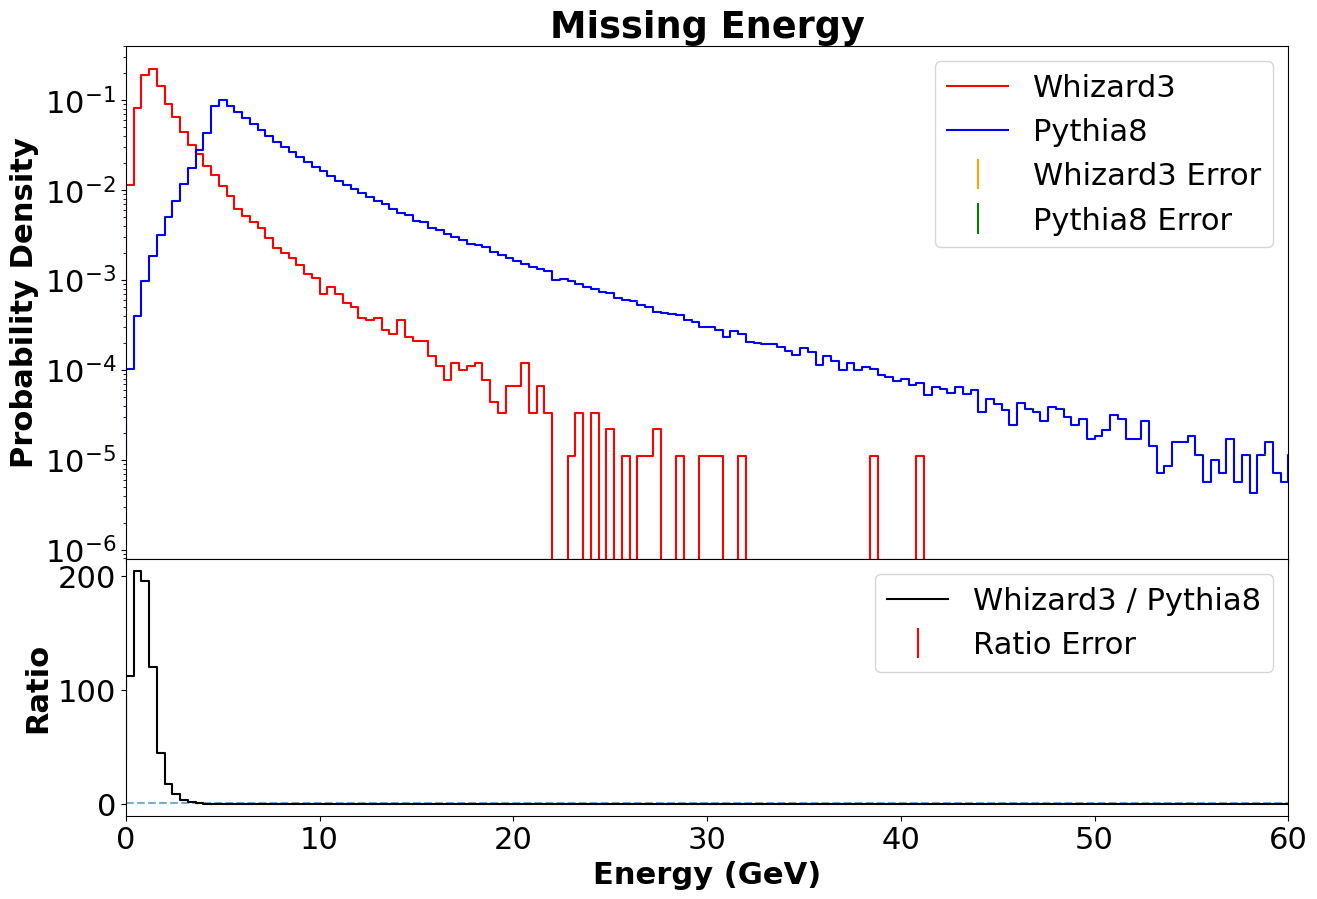

In [6]:
create_shared_ratio_hist(gaga_mE_wh, gaga_mE_py, 'Whizard3', 'Pythia8', r'Missing Energy', 'Energy (GeV)', 60)

/tmp/ipykernel_132844/2521902930.py:47: RuntimeWarning: invalid value encountered in divide
  error_ratio = np.sqrt((errorbars1/org_hist2_y)**2 + ((org_hist1_y * errorbars2)/(org_hist2_y**2))**2 )
/tmp/ipykernel_132844/2521902930.py:51: RuntimeWarning: invalid value encountered in divide
  hist3_y = hist1_y / (hist2_y)


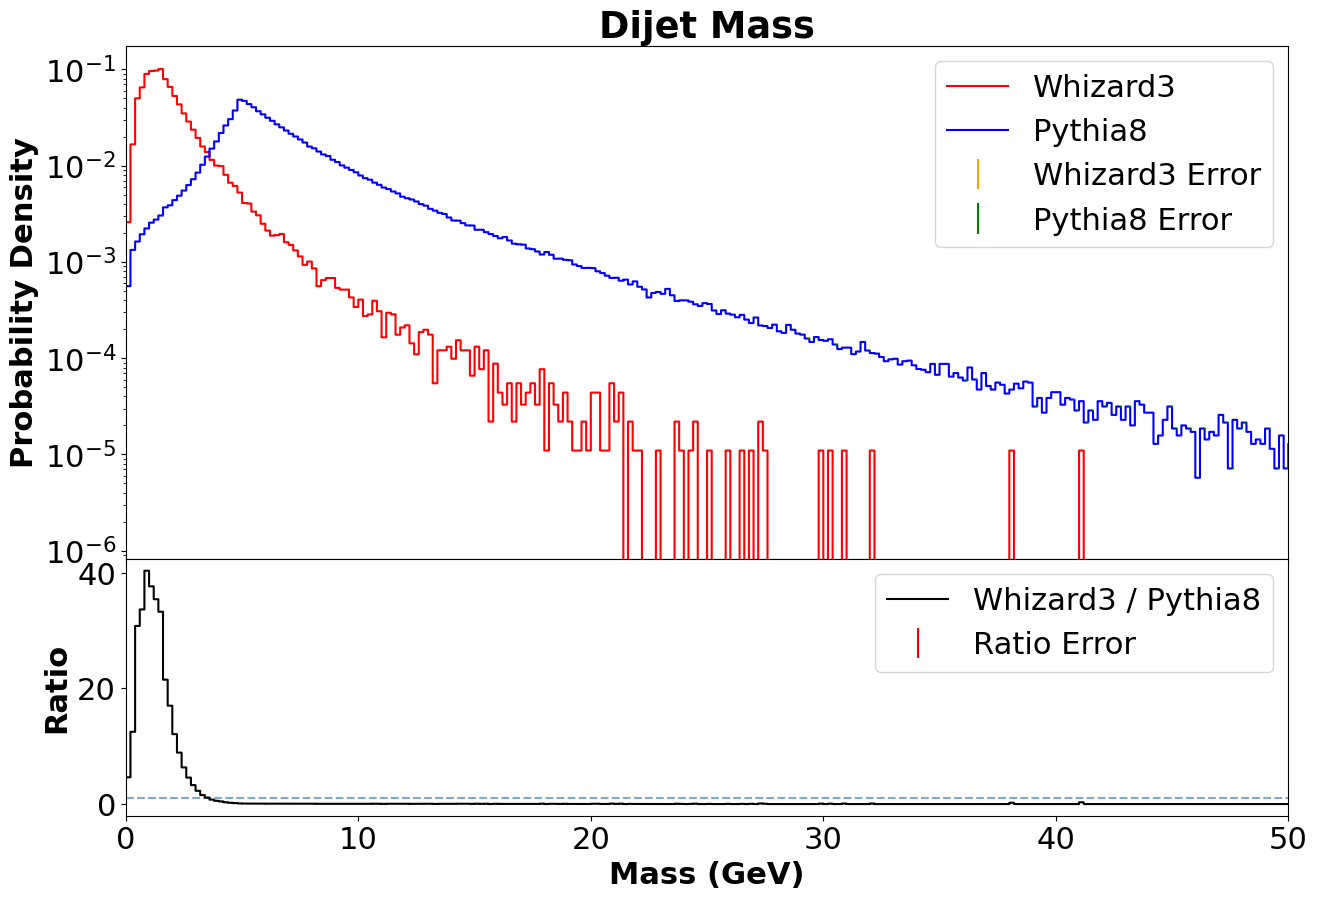

In [8]:
create_shared_ratio_hist(gaga_ma_wh, gaga_ma_py, 'Whizard3', 'Pythia8', r'Dijet Mass', 'Mass (GeV)', 50)

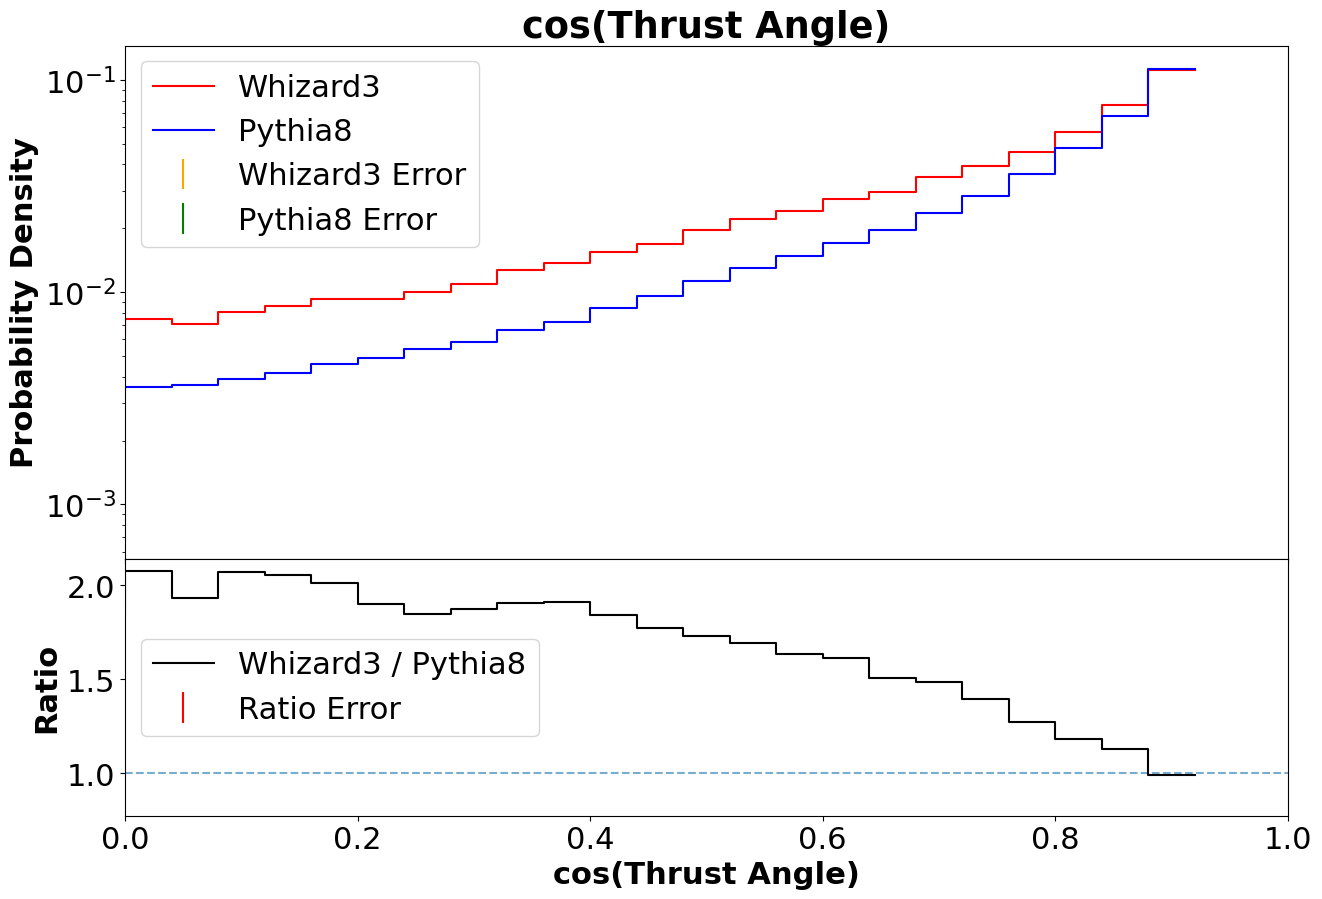

In [11]:
create_shared_ratio_hist(gaga_th_wh, gaga_th_py, 'Whizard3', 'Pythia8', r'cos(Thrust Angle)', 'cos(Thrust Angle)', 1)